## Imports



In [1]:
# <hide-input>

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

NOT_KAGGLE = os.getenv('KAGGLE_URL_BASE') is None
path = './wash_data/' if NOT_KAGGLE else '../input/credit-card-approval-prediction/'

## 1. Data combination and de-duplication

This dataset's objective is predicting whether an applicant's credit card approval will be approved or not. The dataset contains applicants' basic information and applicants'credit history. There are **433887** rows in application.csv. ID is from **5008804** to **7999952**. In credit_record.csv, there are **1048575** rows of **45985** ID's credit record. ID is from **5001711** to **5150487**.

### 1.1 Application record
Use `pandas.read_csv` to read application_record.csv in memory. There will be a `pandas DataFrame` having the following columns:

* `ID`: Unique Id of the row
* `CODE_GENDER`: Gender of the applicant. M is male and F is female.
* `FLAG_OWN_CAR`: Is an applicant with a car. Y is Yes and N is NO.
* `FLAG_OWN_REALTY`: Is an applicant with realty. Y is Yes and N is No.
* `CNT_CHILDREN`: Count of children.
* `AMT_INCOME_TOTAL`: the amount of the income.
* `NAME_INCOME_TYPE`: The type of income (5 types in total).
* `NAME_EDUCATION_TYPE`: The type of education (5 types in total).
* `NAME_FAMILY_STATUS`: The type of family status (6 types in total).
* `DAYS_BIRTH`: The number of the days from birth (Negative values).
* `DAYS_EMPLOYED`: The number of the days from employed (Negative values). This column has **error values**.
* ` FLAG_MOBIL`: Is an applicant with a mobile. 1 is True and 0 is False.
* ` FLAG_WORK_PHONE`: Is an applicant with a work phone. 1 is True and 0 is False.
* `FLAG_PHONE`: Is an applicant with a phone. 1 is True and 0 is False.
* `FLAG_EMAIL`: Is an applicant with a email. 1 is True and 0 is False.
* ` OCCUPATION_TYPE`: The type of occupation (19 types in total). This column has **missing values**.
* ` CNT_FAM_MEMBERS`: The count of family members.

In [2]:
application_df = pd.read_csv(path+"application_record.csv")
application_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


There are many duplicate rows in application_record.csv. They have the same values in rows except `ID`. Some of them have adjacent `ID`, but others are not. By using `df.drop_duplicates`, we can drop the duplicate rows to grantee that any applicant corresponds to only one applications.

In [3]:
application_df.loc[application_df.DAYS_EMPLOYED==-1194].loc[application_df.DAYS_BIRTH== -10554]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
213,5009031,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
214,5009032,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
215,6153669,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0


In [4]:
application_df = application_df.drop_duplicates(subset=application_df.columns[1:], keep='first', inplace=False)
application_df.loc[application_df.DAYS_BIRTH== -10554]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
213,5009031,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
359960,6491536,F,Y,Y,0,234000.0,Working,Secondary / secondary special,Married,House / apartment,-10554,-1741,1,0,1,0,Waiters/barmen staff,2.0
363841,6508956,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-534,1,0,0,0,Laborers,1.0
375944,6590652,M,Y,N,0,315000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10554,-2127,1,0,0,0,Drivers,2.0


### 1.2 Credit record
This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.

After reading the data, we have the following columns.

* `ID`: Unique Id of the row in application record.
* `MONTHS_BALANCE`: The number of months from record time.
* `STATUS`: Credit status for this month.
        X: No loan for the month
        C: paid off that month 
        0: 1-29 days past due 
        1: 30-59 days past due 
        2: 60-89 days overdue
        3: 90-119 days overdue 
        4: 120-149 days overdue 
        5: Overdue or bad debts, write-offs for more than 150 days 


In [5]:
credit_status = pd.read_csv(path+"credit_record.csv")

# replace X, and C by 0
credit_status.STATUS.replace('X', 0, inplace=True)
credit_status.STATUS.replace('C', 0, inplace=True)
credit_status.STATUS = credit_status.STATUS.astype('int')

# record the worst credit record.
credit_record = credit_status.groupby('ID').STATUS.max()
credit_record.head(10)

# combine two table
df = pd.merge(application_df, credit_record, how='inner', on=['ID'])

In [6]:
df.STATUS = df.STATUS.apply(lambda x: 1 if x >= 2 else 0)
df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0


In [7]:
df = df.sort_values('AMT_INCOME_TOTAL')
df = df.reset_index(drop=True)
df.ID=df.index
df.columns = ('User_id',
              'Gender',
              'Car',
              'Realty',
              'children_count',
              'income_amount',
              'income_type',
              'education_type',
              'Family_status',
              'Housing_type',
              'Days_birth',
              'Days_employed',
              'Mobile',
              'Work_phone',
              'Phone',
              'Email',
              'Occupation_type',
              'Count_family_members',
              'Reject'
              )

In [8]:
df

,User_id,Gender,Car,Realty,children_count,income_amount,income_type,education_type,Family_status,Housing_type,Days_birth,Days_employed,Mobile,Work_phone,Phone,Email,Occupation_type,Count_family_members,Reject
0,0,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,0
1,1,F,N,Y,0,27000.0,Working,Secondary / secondary special,Married,House / apartment,-19128,-1323,1,1,0,0,Security staff,2.0,0
2,2,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,1,0,0,0,NaN,2.0,0
3,3,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,-23770,365243,1,0,0,0,NaN,2.0,0
4,4,M,N,Y,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22564,365243,1,0,0,0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,9704,M,Y,N,0,1125000.0,Commercial associate,Secondary / secondary special,Married,Rented apartment,-15960,-1646,1,0,0,0,Managers,2.0,0
9705,9705,M,Y,Y,1,1125000.0,Working,Higher education,Married,House / apartment,-16616,-1624,1,0,0,0,Managers,3.0,0
9706,9706,F,Y,Y,2,1125000.0,Commercial associate,Higher education,Married,House / apartment,-14339,-2653,1,1,1,0,Managers,4.0,0
9707,9707,M,Y,N,0,1350000.0,Commercial associate,Higher education,Married,Municipal apartment,-12999,-1560,1,0,1,1,Managers,2.0,0


In [9]:
print('There are '+str(df.Reject.sum()) +' rejected applicants\n', str(round(df.Reject.sum()/len(df)*100,2)) +'% in 9710 applicants')


There are 206 rejected applicants
 2.12% in 9710 applicants


## 2. Exploratory data analysis

### 2.1 binary features
There are 7 binary features in the dataset `Gender`, `Car`, `Realty`, `Mobile`, `Work_phone`, `Phone` and `Email`. We find every applicant has a mobile. So we drop column `Mobile`.


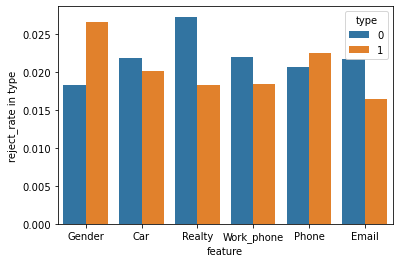

,feature,type,reject_rate in type,count,Reject_count
0,Gender,0,0.018346,6323,116
1,Gender,1,0.026580,3386,90
2,Car,0,0.021828,6139,134
3,Car,1,0.020168,3570,72
4,Realty,0,0.027281,3189,87
5,Realty,1,0.018252,6520,119
6,Work_phone,0,0.021979,7598,167
7,Work_phone,1,0.018475,2111,39
8,Phone,0,0.020677,6916,143
9,Phone,1,0.022556,2793,63


In [10]:
binary_features = ['Gender', 'Car', 'Realty', 'Work_phone', 'Phone', 'Email']
binary_df = df[binary_features+['Reject']].replace('M', 1).replace('F', 0).replace('Y', 1).replace('N', 0)
dict_list = []
for feature in binary_features:
    for one_type in [0, 1]:
        dict_list.append({'feature': feature,
                          'type': one_type,
                          'reject_rate in type': len(binary_df[binary_df[feature]==one_type][binary_df.Reject==1])/len(binary_df[binary_df[feature]==one_type]),
                          'count': len(binary_df[binary_df[feature]==one_type]),
                          'Reject_count': len(binary_df[binary_df[feature]==one_type][binary_df.Reject==1])
                         })

group_binary = pd.DataFrame.from_dict(dict_list)
sns.barplot(x="feature", y="reject_rate in type", hue="type", data=group_binary)
plt.show()
group_binary

In the figure above, we can notice that Gender and Realty are high value columns for credit approval, but Phone and Car are not.

### 2.2 Digital features
There are 5 digital features in the dataset `children_count`, `income_amount`, `Days_birth`, `Days_employed` and `Count_family_members`. `children_count` and `Count_family_members` are features with a small scale.



#### 2.2.1 children_count

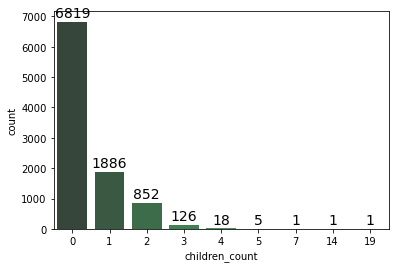

In [11]:
sns.countplot(x="children_count", data=df, palette="Greens_d")
children_count = df.children_count.value_counts()
for a,b in zip(range(len(children_count)), children_count):
    plt.text(a, b+50, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

From the figure above, we can find that few of applicants have more than 2 child, so we seperate the applicants into four parts.

The reject rate of applicants with 0, 1 or 2 children are not quite different.

In [12]:
children_count_4 = [children_count[0], children_count[1], children_count[2], children_count[3:].sum()]
children_count_4_reject = [len(df[df.children_count==0][df.Reject==1]),
                           len(df[df.children_count==1][df.Reject==1]),
                           len(df[df.children_count==2][df.Reject==1]),
                           len(df[df.children_count>=3][df.Reject==1])]

children_count_df = pd.DataFrame.from_dict({'children_count':children_count_4, 'reject_count':children_count_4_reject})
children_count_df['approved_count'] = children_count_df.children_count - children_count_df.reject_count
children_count_df['reject_rate'] = children_count_df.reject_count/children_count_df.children_count
children_count_df

,children_count,reject_count,approved_count,reject_rate
0,6819,138,6681,0.020238
1,1886,42,1844,0.022269
2,852,20,832,0.023474
3,152,6,146,0.039474


#### 2.2.2 Count_family_members

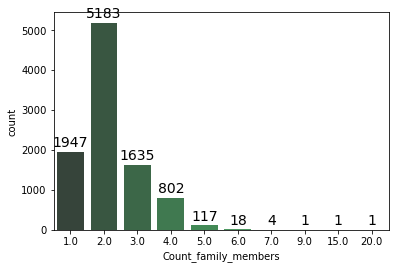

In [13]:
sns.countplot(x="Count_family_members", data=df, palette="Greens_d")
family_members_count = df.Count_family_members.apply(int).value_counts().sort_index()
for a,b in zip(range(len(family_members_count)), family_members_count):
    plt.text(a, b+50, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

In [14]:
family_members_4 = [family_members_count[1], family_members_count[2], family_members_count[3], family_members_count[4:].sum()]
family_members_4_reject = [len(df[df.Count_family_members==1.0][df.Reject==1]),
                           len(df[df.Count_family_members==2.0][df.Reject==1]),
                           len(df[df.Count_family_members==3.0][df.Reject==1]),
                           len(df[df.Count_family_members>=4.0][df.Reject==1])]

family_members_count_df = pd.DataFrame.from_dict({'family_members_count':family_members_4, 'reject_count':family_members_4_reject})
family_members_count_df['approved_count'] = family_members_count_df.family_members_count - family_members_count_df.reject_count
family_members_count_df['reject_rate'] = family_members_count_df.reject_count/family_members_count_df.family_members_count
family_members_count_df

,family_members_count,reject_count,approved_count,reject_rate
0,1947,47,1900,0.024140
1,5183,104,5079,0.020066
2,1635,34,1601,0.020795
3,142,21,121,0.147887


From the chart above, Reject rate of applicants with 1, 2 or 3 family members are similar. More children usually means more family members, so the conclusion seems similar.

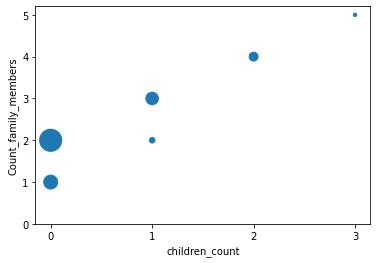

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
gp=df.groupby(by=['children_count','Count_family_members'])
gp_df = gp.size().reset_index(name='times').sort_values('times', ascending=False)[:6]
gp_df['times_10'] = gp_df['times'].apply(lambda x: x/10)
ax.scatter(gp_df['children_count'], gp_df['Count_family_members'], s=gp_df['times_10'])
plt.xticks(range(4))
plt.yticks(range(6))
plt.xlabel('children_count')
plt.ylabel('Count_family_members')
plt.show()

In [16]:
gp=df.groupby(by=['children_count','Count_family_members'])
gp_df = gp.size().reset_index(name='times').sort_values('times', ascending=False)[:6]

gp_df

,children_count,Count_family_members,times
1,0,2.0,4880
0,0,1.0,1939
4,1,3.0,1577
7,2,4.0,792
3,1,2.0,303
9,3,5.0,116


#### 2.2.3 income_amount
The following figures are a **histogram** and **Box diagram**

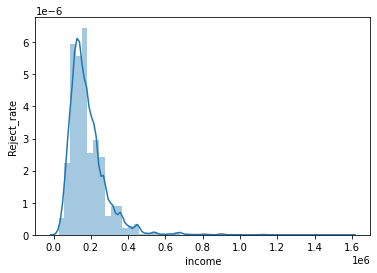

In [17]:
income_plot = pd.Series(df.income_amount, name="income")
plt.ylabel('Reject_rate')
sns.distplot(income_plot)
plt.show()

We can notice that most applicants' income is lower than 40000. So we select these applicants to get box plot.

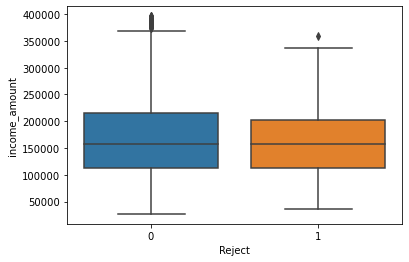

In [18]:
sns.boxplot(x="Reject", y="income_amount", data=df[df.income_amount<=400000])
plt.show()

#### 2.2.4 Days_birth
We firstly transform the days from birth into years, and get the **histogram** and **Box diagram**.

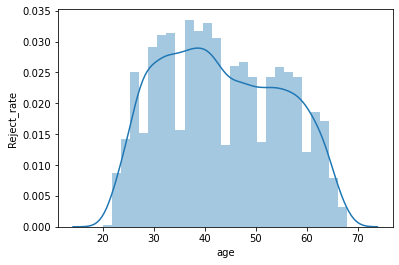

In [19]:
age_series = df.Days_birth.apply(lambda x: int(-x / 365.25))
plt.ylabel('Reject_rate')
age_plot = pd.Series(age_series, name="age")
sns.distplot(age_plot)
plt.show()

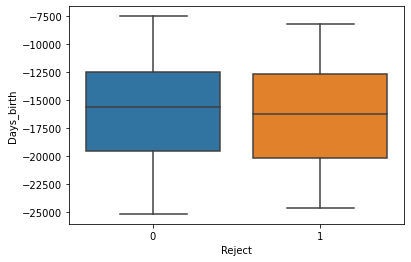

In [20]:
sns.boxplot(x="Reject", y="Days_birth", data=df)
plt.show()

#### 2.2.5 Days_employed

There are error values in this column. We will drop them first and get the employed year of each applicants

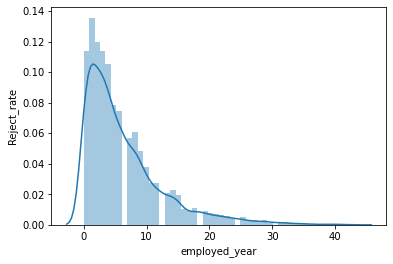

In [21]:
employed_year_series = df[df.Days_employed<0].Days_employed.apply(lambda x: int(-x // 365.25))
plt.ylabel('Reject_rate')
employed_year_plot = pd.Series(employed_year_series, name="employed_year")
sns.distplot(employed_year_plot)
plt.show()

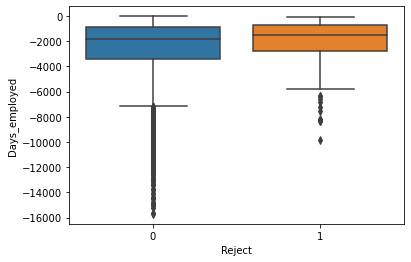

In [22]:
sns.boxplot(x="Reject", y="Days_employed", data=df[df.Days_employed<0])
plt.show()

### 2.3 EDA for digital features
We are going to develop the relation between `Reject` with `age` and `income` or `employed years` and `income`.

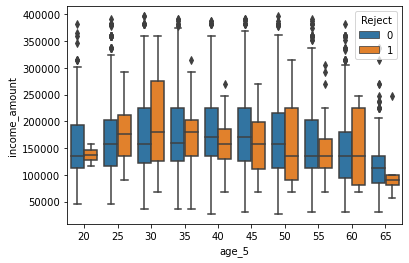

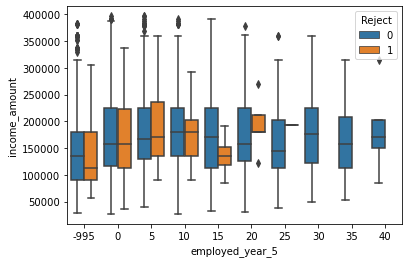

In [23]:
new_df= df
new_df['income_5000'] = df.Days_birth.apply(lambda x: int(-x / 365.25 /5) *5)
new_df['age_5'] = df.Days_birth.apply(lambda x: int(-x / 365.25 /5) *5)
new_df['employed_year_5'] = df.Days_employed.apply(lambda x: int(-x / 365.25 /5) *5)
plot_fig = plt.figure()
aei_plot = sns.boxplot(x="age_5", y="income_amount", hue='Reject', data=df[df.income_amount<=400000])
plt.show()
aei_plot = sns.boxplot(x="employed_year_5", y="income_amount", hue='Reject', data=df[df.income_amount<=400000])
plt.show()

As figures above, we can know that in terms of age and income rejected applicants are not quite different from approved applicants through the combination of five-number summary in boxplot. However, in terms of age and employed year, applicants with more than 20 years of service are more likely not to be rejected.

Then I am going to generate a barplot to show the relation between reject rate and age_income or employed_year_income.

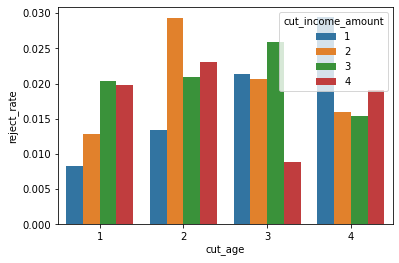

In [24]:
# remove outliers and error rows 
new_df = df[df.income_amount<=400000][df.Days_employed<0]

# transform days to month
new_df['age_month'] = df.Days_birth.apply(lambda x: int(-x / 30.417))
new_df['employed_month'] = df.Days_employed.apply(lambda x: int(-x / 30.417))

# seperate age_month, employed_month, and income
quantile_new_df = new_df[['age_month', 'employed_month', 'income_amount']].quantile([0, 0.25, 0.5, 0.75, 1])
new_df['cut_age'] = pd.cut(new_df['age_month'],bins=quantile_new_df.age_month, right=False, labels=[1, 2, 3, 4])
new_df['cut_employed_month'] = pd.cut(new_df['employed_month'],bins=quantile_new_df.employed_month, right=False, labels=[1, 2, 3, 4])
new_df['cut_income_amount'] = pd.cut(new_df['income_amount'],bins=quantile_new_df.income_amount, right=False, labels=[1, 2, 3, 4])

# group the new_df by age and income
gp_age_income_reject = new_df[new_df.Reject==1].groupby(by=['cut_age','cut_income_amount']).size().reset_index(name='reject_times')
gp_age_income_total = new_df.groupby(by=['cut_age','cut_income_amount']).size().reset_index(name='times')
gp_age_income_reject_rate = pd.merge(gp_age_income_total, gp_age_income_reject, how='outer', on=['cut_age','cut_income_amount'])
gp_age_income_reject_rate['reject_rate'] = gp_age_income_reject_rate.reject_times/gp_age_income_reject_rate.times
sns.barplot(x="cut_age", y="reject_rate", hue="cut_income_amount", data=gp_age_income_reject_rate)
plt.show()

From the figure above, we can know that the older applicants with a lower income is more likely to be rejected during credit card approval. In contrast, the older applicants with a higher income will be approved.

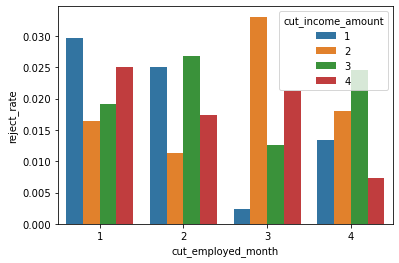

In [25]:
# group the dataset through cut_employed_year and income.
gp_employed_income_reject = new_df[new_df.Reject==1].groupby(by=['cut_employed_month','cut_income_amount']).size().reset_index(name='reject_times')
gp_employed_income_total = new_df.groupby(by=['cut_employed_month','cut_income_amount']).size().reset_index(name='times')
gp_employed_income_reject_rate = pd.merge(gp_employed_income_total, gp_employed_income_reject, how='outer', on=['cut_employed_month','cut_income_amount'])
gp_employed_income_reject_rate['reject_rate'] = gp_employed_income_reject_rate.reject_times/gp_employed_income_reject_rate.times
sns.barplot(x="cut_employed_month", y="reject_rate", hue="cut_income_amount", data=gp_employed_income_reject_rate)
plt.show()

From the figure above, we can know that the applicants with a lower income and higher employed years is more likely not to be rejected.

### 2.3 class features

There are five type of class features: `income_type`, `education_type`,`Family_status`,`Housing_type`,`Occupation_type`.

#### 2.3.1 income_type

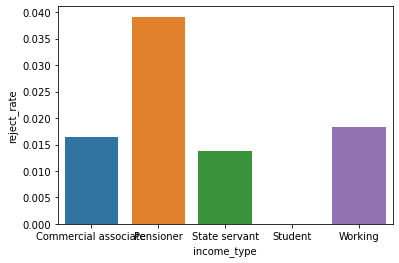

,income_type,times,reject_times,reject_rate
0,Commercial associate,2312,38.0,0.016436
1,Pensioner,1712,67.0,0.039136
2,State servant,722,10.0,0.013850
3,Student,3,0.0,0.000000
4,Working,4960,91.0,0.018347


In [26]:
gp_total=df.groupby(by=['income_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['income_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['income_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="income_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

#### 2.3.2 education_type

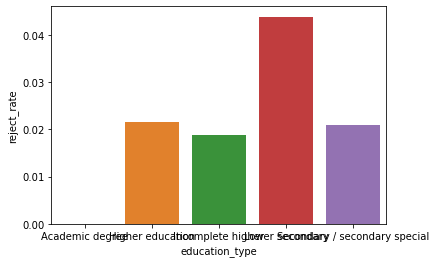

,education_type,times,reject_times,reject_rate
0,Academic degree,6,0.0,0.000000
1,Higher education,2457,53.0,0.021571
2,Incomplete higher,371,7.0,0.018868
3,Lower secondary,114,5.0,0.043860
4,Secondary / secondary special,6761,141.0,0.020855


In [27]:
gp_total=df.groupby(by=['education_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['education_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['education_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="education_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

#### 2.3.3 Family_status

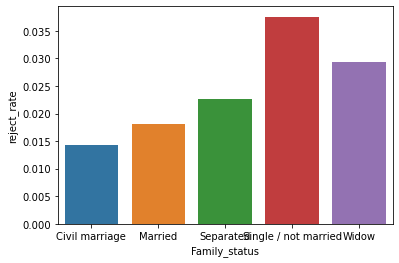

,Family_status,times,reject_times,reject_rate
0,Civil marriage,836,12,0.014354
1,Married,6530,118,0.018070
2,Separated,574,13,0.022648
3,Single / not married,1359,51,0.037528
4,Widow,410,12,0.029268


In [28]:
gp_total=df.groupby(by=['Family_status']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['Family_status']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Family_status']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="Family_status", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

#### 2.3.4 Housing_type

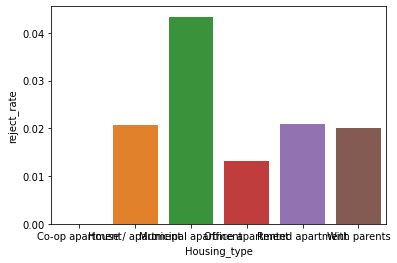

,Housing_type,times,reject_times,reject_rate
0,Co-op apartment,34,0.0,0.000000
1,House / apartment,8684,179.0,0.020613
2,Municipal apartment,323,14.0,0.043344
3,Office apartment,76,1.0,0.013158
4,Rented apartment,144,3.0,0.020833
5,With parents,448,9.0,0.020089


In [29]:
gp_total=df.groupby(by=['Housing_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['Housing_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Housing_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="Housing_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

#### 2.3.5 Occupation_type

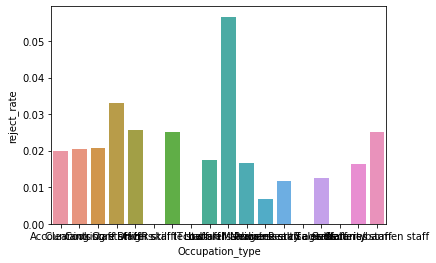

,Occupation_type,times,reject_times,reject_rate
15,Secretaries,46,0.0,0.000000
13,Realty agents,16,0.0,0.000000
5,HR staff,22,0.0,0.000000
7,IT staff,18,0.0,0.000000
11,Medicine staff,291,2.0,0.006873
12,Private service staff,86,1.0,0.011628
14,Sales staff,959,12.0,0.012513
16,Security staff,182,3.0,0.016484
10,Managers,782,13.0,0.016624
8,Laborers,1724,30.0,0.017401


In [30]:
gp_total=df.groupby(by=['Occupation_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['Occupation_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Occupation_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="Occupation_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate.sort_values('reject_rate')